In [2]:
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

import os 
import seaborn as sns #for styling the plots
import statsmodels.formula.api as smf
import warnings
import urllib.request
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
# Rolling sales data
# The Department of Finance’s Rolling Sales files lists properties that sold in the last twelve-month period in New York City for all tax classes. These files include:
# sale date
# the address, zip code and tax borough, block and lot (BBL)
# building type;
# square footage;
# the price
# other characteristics

In [ ]:
#Step 1. Fetch the data

In [4]:
#prepare a path to save the data by using os
#use urllib to request

os.makedirs("Data/RollingSale", exist_ok=True)

for year in range(2011, 2020):
    for boro in ['manhattan','bronx','brooklyn','queens','statenisland']:
        try:
            url = f'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/{year}/{year}_{boro}.xls'
            urllib.request.urlretrieve(url, f'Data/RollingSale/{year}{boro}.xls')
        except urllib.error.HTTPError:
            url = f'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/{year}/{year}_{boro}.xlsx'
            urllib.request.urlretrieve(url, f'Data/RollingSale/{year}{boro}.xlsx')

print("done")

done


In [5]:
#Step 2. Clean the format

In [6]:
#As we may recall from the previous lab, we need to skip first 4 rows before the data can be uploaded properly.

Sales = pd.read_excel('./Data/RollingSale/2012manhattan.xls')
Sales.head()

,"MANHATTAN ANNUALIZE SALE FOR YEAR 2012. All Sales From Jan 1, 2012 - Dec 31, 2012.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 03/31/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name and Descriptive Data is as o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,10,,C0,356 EAST 8TH STREET,,...,3,0,3,1804,2928,1899,1,C0,0,2012-07-09 00:00:00


In [7]:
'''skip first four rows'''
Sales = pd.read_excel('./Data/RollingSale/2012manhattan.xls',skiprows=4)
Sales

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,10,,C0,356 EAST 8TH STREET,,...,3,0,3,1804,2928,1899,1,C0,0,2012-07-09
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,,C4,715 EAST 5TH STREET,,...,20,0,20,2426,9345,1900,2,C4,3650000,2012-09-06
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,,C4,274 EAST SEVENTH STREET,,...,13,0,13,2726,13002,1910,2,C4,895250,2012-10-25
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,,C2,271 EAST 7TH STREET,,...,5,0,5,2169,3728,1900,2,C2,0,2012-02-16
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,387,157,,C1,619 EAST 5TH STREET,,...,40,0,40,4853,25200,1900,2,C1,10800000,2012-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26253,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2170,27,,G7,655 WEST 187 STREET,,...,0,0,0,1582,0,0,4,G7,0,2012-09-24
26254,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2170,28,,G7,657 WEST 187 STREET,,...,0,0,0,1582,0,0,4,G7,4750000,2012-09-24
26255,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2170,32,,G7,667 WEST 187 STREET,,...,0,0,0,4496,0,0,4,G7,0,2012-09-24
26256,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2246,43,,G1,270 DYCKMAN STREET,,...,0,2,2,14980,46200,1929,4,G1,4917000,2012-09-11


In [8]:
#check column names
print(Sales.columns)

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')


In [9]:
#fix column names, excluding \n
Sales.columns = [col.replace('\n','') for col in Sales.columns]
Sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,10,,C0,356 EAST 8TH STREET,,...,3,0,3,1804,2928,1899,1,C0,0,2012-07-09
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,,C4,715 EAST 5TH STREET,,...,20,0,20,2426,9345,1900,2,C4,3650000,2012-09-06
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,,C4,274 EAST SEVENTH STREET,,...,13,0,13,2726,13002,1910,2,C4,895250,2012-10-25
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,,C2,271 EAST 7TH STREET,,...,5,0,5,2169,3728,1900,2,C2,0,2012-02-16
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,387,157,,C1,619 EAST 5TH STREET,,...,40,0,40,4853,25200,1900,2,C1,10800000,2012-07-13


In [10]:
Sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [11]:
#subset dataframe by selecting columns we're going to use
selectedNames = ['BOROUGH','BLOCK','LOT', 'BUILDING CLASS CATEGORY', 'ADDRESS', 'ZIP CODE',
                'GROSS SQUARE FEET', 'YEAR BUILT','SALE PRICE', 'SALE DATE']
Sales = Sales[selectedNames]
Sales.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,377,10,03 THREE FAMILY HOMES,356 EAST 8TH STREET,10009,2928,1899,0,2012-07-09
1,1,375,62,07 RENTALS - WALKUP APARTMENTS,715 EAST 5TH STREET,10009,9345,1900,3650000,2012-09-06
2,1,376,30,07 RENTALS - WALKUP APARTMENTS,274 EAST SEVENTH STREET,10009,13002,1910,895250,2012-10-25
3,1,377,52,07 RENTALS - WALKUP APARTMENTS,271 EAST 7TH STREET,10009,3728,1900,0,2012-02-16
4,1,387,157,07 RENTALS - WALKUP APARTMENTS,619 EAST 5TH STREET,10009,25200,1900,10800000,2012-07-13


In [12]:
#Step 3. Merge all rolling sales data into a single dataframe

In [13]:
# get all the files from a given folder
files = os.listdir('./Data/RollingSale/')
files

['2011bronx.xls',
 '2011brooklyn.xls',
 '2011manhattan.xls',
 '2011queens.xls',
 '2011statenisland.xls',
 '2012bronx.xls',
 '2012brooklyn.xls',
 '2012manhattan.xls',
 '2012queens.xls',
 '2012statenisland.xls',
 '2013bronx.xls',
 '2013brooklyn.xls',
 '2013manhattan.xls',
 '2013queens.xls',
 '2013statenisland.xls',
 '2014bronx.xls',
 '2014brooklyn.xls',
 '2014manhattan.xls',
 '2014queens.xls',
 '2014statenisland.xls',
 '2015bronx.xls',
 '2015brooklyn.xls',
 '2015manhattan.xls',
 '2015queens.xls',
 '2015statenisland.xls',
 '2016bronx.xls',
 '2016brooklyn.xls',
 '2016manhattan.xls',
 '2016queens.xls',
 '2016statenisland.xls',
 '2017bronx.xls',
 '2017brooklyn.xls',
 '2017manhattan.xls',
 '2017queens.xls',
 '2017statenisland.xls',
 '2018bronx.xlsx',
 '2018brooklyn.xlsx',
 '2018manhattan.xlsx',
 '2018queens.xlsx',
 '2018statenisland.xlsx',
 '2019bronx.xlsx',
 '2019brooklyn.xlsx',
 '2019manhattan.xlsx',
 '2019queens.xlsx',
 '2019statenisland.xlsx']

In [14]:
#read all those files and merge into a single dataframe (assume they have the same format which is apparently the case)
Sales = pd.read_excel('./Data/RollingSale/'+files[0],skiprows=4) #read the first one to set up the dataframe
Sales.columns = [name.replace('\n','') for name in Sales.columns] #fix the columns
Sales = Sales[selectedNames] #filter the columns 

for file in files[1:]: #for all the files in the folder
    if '.xls' in  file: #just in case take only Excel ones (both xls and xlsx will qualify)
        df = pd.read_excel('./Data/RollingSale/'+file,skiprows=4)
        df.columns = [name.replace('\n','') for name in df.columns]  # fix the columns for all files
        df = df[selectedNames]  # filter the columns for all files
        # pd.concat: Concatenate pandas objects along rows or columns
        Sales = pd.concat([Sales,df],axis=0)

In [15]:
Sales.head() #preview the data

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,2,3037,42,01 ONE FAMILY HOMES,4428 PARK AVENUE,10457.0,1340.0,1899.0,0,2011-02-08
1,2,3039,64,01 ONE FAMILY HOMES,467 EAST 185 STREET,10458.0,1296.0,1910.0,329000,2011-01-19
2,2,3046,34,01 ONE FAMILY HOMES,2085 BATHGATE AV,10457.0,1629.0,1899.0,288500,2011-06-29
3,2,3048,28,01 ONE FAMILY HOMES,540 EAST 182ND STREET,10457.0,1048.0,1901.0,122500,2011-03-21
4,2,3053,103,01 ONE FAMILY HOMES,2327 BASSFORD AVENUE,10458.0,1248.0,1901.0,10,2011-08-25


In [16]:
len(Sales) #total number of records

773881

In [17]:
#Step 4. Descriprive analysis and data cleaning

In [18]:
Sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,773881.000000,773881.000000,773881.000000,773865.000000,7.566550e+05,767854.000000,7.738810e+05,773881
mean,2.883927,4036.389453,384.327311,10777.839641,4.355976e+03,1769.972981,1.067202e+06,2015-07-24 05:24:12.479127808
min,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2011-01-01 00:00:00
25%,1.000000,1196.000000,22.000000,10128.000000,0.000000e+00,1920.000000,0.000000e+00,2013-06-10 00:00:00
50%,3.000000,2895.000000,50.000000,11207.000000,1.170000e+03,1936.000000,3.370000e+05,2015-07-29 00:00:00
75%,4.000000,5986.000000,1002.000000,11355.000000,2.279000e+03,1965.000000,7.300000e+05,2017-09-17 00:00:00
max,5.000000,16350.000000,9139.000000,11697.000000,8.942176e+06,2020.000000,4.111112e+09,2019-12-31 00:00:00
std,1.320072,3538.164489,662.368159,884.277142,3.245737e+04,564.868687,1.302796e+07,NaN


In [19]:
# we get an average year built for the houses 1770. Is NYC really THAT old?
# we can see all the numeric characteristics we're going to use in our analysis 
# - zip code, size, price and year built have zero values. And accoridn to percentiles, at least 25% of the properties have missing price or size.

In [22]:
(Sales['ZIP CODE'] == 0).sum() #look like missing zip codes is not a common issue

np.int64(2988)

In [23]:
(Sales['YEAR BUILT'] == 0).sum() #nearly 10% of the records have missing year built

np.int64(70762)

In [24]:
(Sales['GROSS SQUARE FEET'] == 0).sum() #and almost half of the records have missing size

np.int64(328875)

In [25]:
(Sales['SALE PRICE'] == 0).sum() #missing price is also quite common

np.int64(240263)

In [26]:
#so if we were to quantify the average price per square foot accross the entire dataset it might be fully unreliable
Sales['SALE PRICE'].sum()/Sales['GROSS SQUARE FEET'].sum()  

np.float64(250.57481379656724)

In [28]:
#so lets filter the zero values first 
Sales = Sales[(Sales['ZIP CODE'] > 0) & (Sales['GROSS SQUARE FEET'] > 0) & (Sales['YEAR BUILT'] > 0) & (Sales['SALE PRICE'] > 0)]

In [29]:
len(Sales) #unfortunately it wipes out nearly 2/3 of the data records

266256

In [30]:
#now if we repeate the price per square foot assessment for this sample we're getting a 10% lower number
Sales['SALE PRICE'].sum()/Sales['GROSS SQUARE FEET'].sum()

np.float64(231.78240113866826)

In [ ]:
#Still not a reasonable data, check the entire dataset again after filtering

In [31]:
Sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,266256.000000,266256.000000,266256.000000,266256.000000,2.662560e+05,266256.000000,2.662560e+05,266256
mean,3.390083,5231.575281,106.658445,10971.413238,7.727450e+03,1943.061520,1.791087e+06,2015-10-09 14:58:34.332071168
min,1.000000,1.000000,1.000000,10001.000000,1.000000e+00,1050.000000,1.000000e+00,2011-01-01 00:00:00
25%,3.000000,1968.000000,20.000000,10459.000000,1.413750e+03,1920.000000,3.700000e+05,2013-08-30 00:00:00
50%,4.000000,4631.000000,39.000000,11219.000000,2.000000e+03,1931.000000,5.700000e+05,2015-11-16 00:00:00
75%,4.000000,7458.000000,66.000000,11369.000000,3.000000e+03,1960.000000,9.000000e+05,2018-01-11 00:00:00
max,5.000000,16323.000000,9040.000000,11697.000000,8.942176e+06,2019.000000,4.111112e+09,2019-12-31 00:00:00
std,1.107263,3792.350171,293.794325,500.859505,4.488525e+04,33.098829,1.939670e+07,NaN


In [32]:
#Apparently zeros were not the only issue. Even after eliminating then the new min size and price are just 1,
#which still does not make sense. Also the year of 1050 (450 years before Columbus) does not sound too real either.

In [33]:
#Besides, look at the max values - the largest property is 9M sq.feet and the most expensive - $4B worth. 
#Clearly those number might affect the averages and they probably do

In [34]:
#Let's have a look on the distribution

In [35]:
# for the year built 
n_bins = 100
plt.hist(Sales['YEAR BUILT'], bins=n_bins);

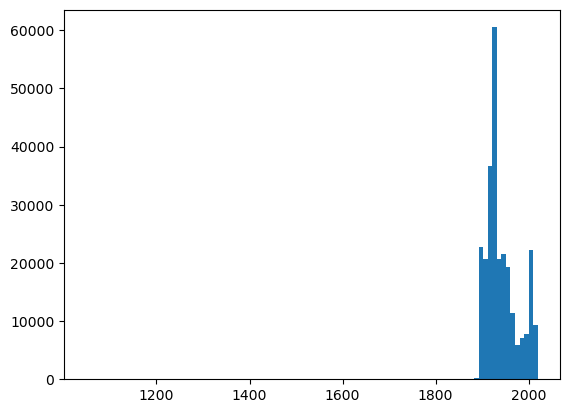

In [36]:
plt.show()

In [37]:
#As we see pretty much all of the houses are built after late 1800's. 
#And we do not have "future years". Based on that impose a "sanity" filter of YEAR>=1850

In [41]:
(Sales['YEAR BUILT']<1850).sum() #this way we only lose 123 records

np.int64(123)

In [42]:
# for the price, if we try to plot the histogram directly, it does not make much sense 
#as nearly everything falls in the lowest bin 
plt.hist(Sales['SALE PRICE'], bins=100);

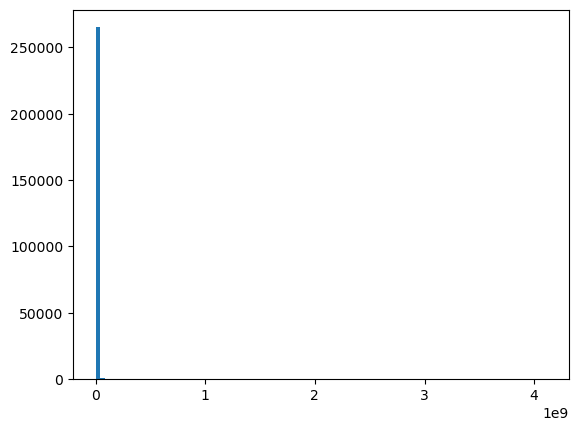

In [43]:
plt.show()

In [44]:
#Two things we can do about it - either limit the range by filtering the obvious outliers, 
#or plot the histogram on the logarithmic scale

In [45]:
#take only properties worth up to 10mln; we can see majority is under 1M and vast majority falls under 2M.
plt.hist(Sales['SALE PRICE'][Sales['SALE PRICE']<1e7], bins=100);

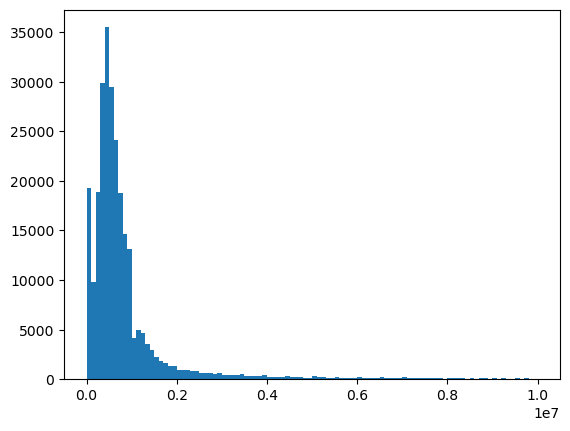

In [46]:
plt.show()

In [47]:
#still the histogram is highly skewed and might not reflect well all the details as far as low and high values are concerned

In [48]:
def plot_loghist(x, bins): #introduce a function for plotting a log-scale histogram
  #it ensures log-scale binning and label on the original scale
    logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),bins)
    plt.hist(x, bins=logbins)
    plt.xscale('log')

In [49]:
plot_loghist(Sales['SALE PRICE'], 100) #log-histogram of prices

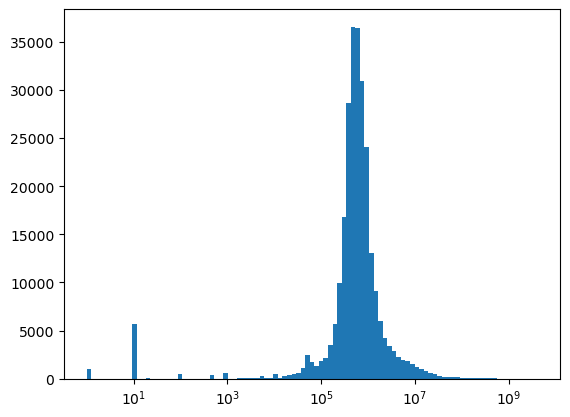

In [50]:
plt.show()

In [ ]:
#shows that regular distribution curve goes somewhat between 10k and 100M. We'll impose this filter

In [51]:
(Sales['SALE PRICE']<1e4).sum() #losing 9000 low outliers

np.int64(8993)

In [52]:
(Sales['SALE PRICE']>=5e8).sum() #losing less than 500 high outliers

np.int64(47)

In [53]:
plot_loghist(Sales['GROSS SQUARE FEET'], 100)

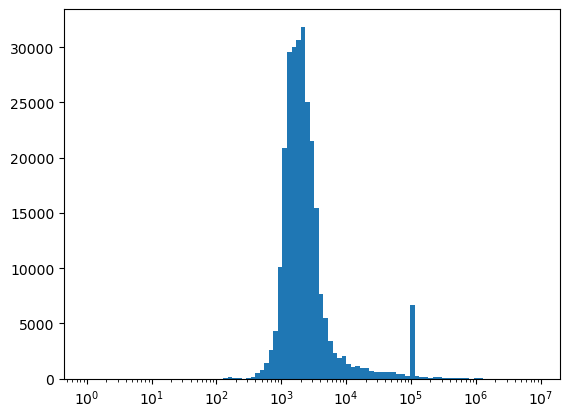

In [54]:
plt.show()

In [ ]:
#for the house size the regular distribution goes between 300 and 100.000 sq.feet,
#however there is an unusual amount of around 100.000(10^5) sq feet properties, which looks like an artifact

In [55]:
(Sales['GROSS SQUARE FEET']>=1e5).sum() #the cutoff at 1e5 seems to cover this artifact, cutting nearly 8000 records

np.int64(7869)

In [56]:
(Sales['GROSS SQUARE FEET']<300).sum() #300ft cutoff shaves 260 low outliers

np.int64(260)

In [57]:
#so lets filter the zero values first 
Sales = Sales[(Sales['YEAR BUILT'] >= 1850) & (Sales['GROSS SQUARE FEET'] >=300) & (Sales['GROSS SQUARE FEET'] <1e5)
              & (Sales['SALE PRICE'] >= 1e4) & (Sales['SALE PRICE'] <= 5e8)]

In [58]:
len(Sales) #the sample shrank to quarter million records - more than 3 times from the initial size

249394

In [59]:
Sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,249394.000000,249394.000000,249394.000000,249394.000000,249394.000000,249394.000000,2.493940e+05,249394
mean,3.460596,5357.611414,108.569144,10997.474859,3370.719556,1941.528834,1.331203e+06,2015-11-01 15:40:14.598586624
min,1.000000,1.000000,1.000000,10001.000000,300.000000,1850.000000,1.000000e+04,2011-01-01 00:00:00
25%,3.000000,2240.000000,20.000000,10463.000000,1400.000000,1920.000000,4.000000e+05,2013-10-04 12:00:00
50%,4.000000,4737.000000,40.000000,11221.000000,1968.000000,1930.000000,5.989250e+05,2015-12-16 00:00:00
75%,4.000000,7623.000000,67.000000,11370.000000,2875.000000,1960.000000,9.250000e+05,2018-01-26 00:00:00
max,5.000000,16323.000000,9040.000000,11697.000000,99946.000000,2019.000000,3.900000e+08,2019-12-31 00:00:00
std,1.048425,3777.734846,295.850111,482.294804,6958.160557,31.731808,4.828788e+06,NaN


In [60]:
#Step 5. Category analysis

In [61]:
print(Sales['BUILDING CLASS CATEGORY'].value_counts().to_string()) #get all the categories including number of their appearances

BUILDING CLASS CATEGORY
01  ONE FAMILY DWELLINGS                        45666
02  TWO FAMILY DWELLINGS                        37775
01 ONE FAMILY DWELLINGS                         25114
02 TWO FAMILY DWELLINGS                         18906
01  ONE FAMILY HOMES                            16877
02  TWO FAMILY HOMES                            14666
01 ONE FAMILY DWELLINGS                         13392
07  RENTALS - WALKUP APARTMENTS                 12703
02 TWO FAMILY DWELLINGS                         10153
03  THREE FAMILY DWELLINGS                       9877
13 CONDOS - ELEVATOR APARTMENTS                  7086
03 THREE FAMILY DWELLINGS                        4560
03  THREE FAMILY HOMES                           3789
22  STORE BUILDINGS                              3274
07 RENTALS - WALKUP APARTMENTS                   3069
14  RENTALS - 4-10 UNIT                          2424
03 THREE FAMILY DWELLINGS                        2391
07 RENTALS - WALKUP APARTMENTS                   1641
08  

In [ ]:
# Some building class categories seem duplicated by using different spelling or spacing. To fix this problem, we need to unify category names and 
#this can be done by the unique two-digit category code we can extract

In [ ]:
# split building class category to two parts: leading 2 digits code (unique category ID) and its textual description than may vary

In [73]:
Sales['CATEGORY ID'] = Sales['BUILDING CLASS CATEGORY'].apply(lambda x:x[:2]) # apply a custom function taking first two digits of the category

In [74]:
Sales['BUILDING CLASS NAME'] = Sales['BUILDING CLASS CATEGORY'].apply(lambda x:x.split(' ',1)[1]).apply(lambda x:x.strip()) # apply a custom function taking middle class name of the category

In [75]:
Sales.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,CATEGORY ID,BUILDING CLASS NAME
1,2,3039,64,01 ONE FAMILY HOMES,467 EAST 185 STREET,10458.0,1296.0,1910.0,329000,2011-01-19,01,ONE FAMILY HOMES
2,2,3046,34,01 ONE FAMILY HOMES,2085 BATHGATE AV,10457.0,1629.0,1899.0,288500,2011-06-29,01,ONE FAMILY HOMES
3,2,3048,28,01 ONE FAMILY HOMES,540 EAST 182ND STREET,10457.0,1048.0,1901.0,122500,2011-03-21,01,ONE FAMILY HOMES
5,2,2929,128,02 TWO FAMILY HOMES,559 CLAREMONT PARKWAY,10457.0,2394.0,1995.0,365000,2011-07-13,02,TWO FAMILY HOMES
6,2,3030,76,02 TWO FAMILY HOMES,4435 PARK AVENUE,10457.0,2125.0,1899.0,375000,2011-05-18,02,TWO FAMILY HOMES


In [76]:
Sales.loc[Sales['CATEGORY ID'] == '01'].groupby(['BOROUGH','CATEGORY ID']).count()

,,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BUILDING CLASS NAME
BOROUGH,CATEGORY ID,,,,,,,,,,
1,01,863,863,863,863,863,863,863,863,863,863
2,01,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584
3,01,17983,17983,17983,17983,17983,17983,17983,17983,17983,17983
4,01,48402,48402,48402,48402,48402,48402,48402,48402,48402,48402
5,01,26217,26217,26217,26217,26217,26217,26217,26217,26217,26217


In [78]:
Sales.loc[Sales['CATEGORY ID'] == '01'].groupby(['ZIP CODE','CATEGORY ID']).count()

,,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BUILDING CLASS NAME
ZIP CODE,CATEGORY ID,,,,,,,,,,
10001.0,01,5,5,5,5,5,5,5,5,5,5
10002.0,01,1,1,1,1,1,1,1,1,1,1
10003.0,01,23,23,23,23,23,23,23,23,23,23
10009.0,01,5,5,5,5,5,5,5,5,5,5
10010.0,01,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11436.0,01,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396
11691.0,01,777,777,777,777,777,777,777,777,777,777
11692.0,01,160,160,160,160,160,160,160,160,160,160


In [79]:
#use groupby to get a list of unique categories (building classes) and use a count of any field (e.g. ADDRESS) to see how often those are occuring
Sales[['CATEGORY ID','BUILDING CLASS NAME','ADDRESS']].groupby(['CATEGORY ID','BUILDING CLASS NAME']).count()

ADDRESS
CATEGORY ID BUILDING CLASS NAME                             
01          ONE FAMILY DWELLINGS                       84172
            ONE FAMILY HOMES                           16877
02          TWO FAMILY DWELLINGS                       66834
            TWO FAMILY HOMES                           14666
03          THREE FAMILY DWELLINGS                     16828
            THREE FAMILY HOMES                          3789
04          TAX CLASS 1 CONDOS                           953
05          TAX CLASS 1 VACANT LAND                      341
06          TAX CLASS 1 - OTHER                           56
07          RENTALS - WALKUP APARTMENTS                17413
08          RENTALS - ELEVATOR APARTMENTS               2131
09          COOPS - WALKUP APARTMENTS                     80
10          COOPS - ELEVATOR APARTMENTS                   90
11          CONDO-RENTALS                                 32
            SPECIAL CONDO BILLING LOTS                    12
12          CONDOS - WALKUP APARTMENTS                   468
13          CONDOS - ELEVATOR APARTMENTS                7090
14          RENTALS - 4-10 UNIT                         3376
15          CONDOS - 2-10 UNIT RESIDENTIAL               902
16          CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT        2
17          CONDO COOPS                                    4
            CONDOPS                                       10
18          TAX CLASS 3 - UNTILITY PROPERTIES              1
21          OFFICE BUILDINGS                            1837
22          STORE BUILDINGS                             4806
23          LOFT BUILDINGS                               302
25          LUXURY HOTELS                                 26
26          OTHER HOTELS                                 183
27          FACTORIES                                   1227
28          COMMERCIAL CONDOS                              4
29          COMMERCIAL GARAGES                          1627
30          WAREHOUSES                                  1603
31          COMMERCIAL VACANT LAND                        39
32          HOSPITAL AND HEALTH FACILITIES               248
33          EDUCATIONAL FACILITIES                       233
34          THEATRES                                      39
35          INDOOR PUBLIC AND CULTURAL FACILITIES        148
36          OUTDOOR RECREATIONAL FACILITIES               22
37          RELIGIOUS FACILITIES                         603
38          ASYLUMS AND HOMES                             79
39          TRANSPORTATION FACILITIES                      7
40          SELECTED GOVERNMENTAL FACILITIES               5
41          TAX CLASS 4 - OTHER                          152
42          CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC         2
43          CONDO OFFICE BUILDINGS                         1
44          CONDO PARKING                                 15
45          CONDO HOTELS                                  10
46          CONDO STORE BUILDINGS                         49

In [ ]:
#Step 6. Calculate price per sqft per category

In [80]:
Price_per_category = Sales[['CATEGORY ID','GROSS SQUARE FEET','SALE PRICE']].groupby(['CATEGORY ID']).sum()

In [81]:
Price_per_category['PRICE_SQFT'] = Price_per_category['SALE PRICE'] / Price_per_category['GROSS SQUARE FEET']

In [82]:
Price_per_category

,GROSS SQUARE FEET,SALE PRICE,PRICE_SQFT
CATEGORY ID,,,
01,164413416.0,64867313313,394.537836
02,183829476.0,59530959618,323.837944
03,62256797.0,18327037380,294.378096
04,1217921.0,577353856,474.048691
05,1287725.0,228265969,177.262979
06,99336.0,26133963,263.086525
07,153094027.0,51160027092,334.173894
08,94133701.0,27977191912,297.206969
09,1700300.0,234957539,138.185931


In [85]:
Price_per_category.sort_values(by='PRICE_SQFT', ascending = False).head()

,GROSS SQUARE FEET,SALE PRICE,PRICE_SQFT
CATEGORY ID,,,
46,268356.0,507037394,1889.420747
43,75232.0,135000000,1794.449171
13,8400152.0,14501866642,1726.381456
15,1172360.0,1452025131,1238.548851
28,3208.0,3742123,1166.497195


In [ ]:
#The most expensive properties are condos, while single, two and three family houses are much cheeper (per sq foot) but also differ from one another

In [86]:
Price_per_category.sort_values(by='PRICE_SQFT', ascending = True).head()

,GROSS SQUARE FEET,SALE PRICE,PRICE_SQFT
CATEGORY ID,,,
18,7200.0,475000,65.972222
10,5663361.0,399568379,70.553224
09,1700300.0,234957539,138.185931
42,11506.0,1868834,162.422562
36,485435.0,82391429,169.727006


In [ ]:
#The least expensive properties are COOP - apartment

In [87]:
len(Sales)

249394

In [88]:
SingleSales = Sales.loc[Sales['CATEGORY ID'] == '01']

In [89]:
len(SingleSales)

101049

In [90]:
SingleSales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,101049.000000,101049.000000,101049.000000,101049.000000,101049.000000,101049.000000,1.010490e+05,101049
mean,3.905759,6469.669457,72.529288,11001.911241,1627.066235,1943.936783,6.419392e+05,2015-11-19 08:12:06.776118528
min,1.000000,14.000000,1.000000,10001.000000,300.000000,1850.000000,1.000000e+04,2011-01-03 00:00:00
25%,3.000000,3689.000000,21.000000,10314.000000,1200.000000,1925.000000,3.600000e+05,2013-10-25 00:00:00
50%,4.000000,5965.000000,41.000000,11234.000000,1440.000000,1940.000000,4.875000e+05,2016-01-20 00:00:00
75%,5.000000,8847.000000,70.000000,11412.000000,1840.000000,1960.000000,6.800000e+05,2017-12-27 00:00:00
max,5.000000,16323.000000,4336.000000,11694.000000,72703.000000,2019.000000,7.710000e+07,2019-12-31 00:00:00
std,0.897559,3786.384803,149.610895,491.674879,842.525763,27.489348,1.104396e+06,NaN


In [ ]:
#apply one additional sanity check to check for properties too cheep/expensive given the size

In [91]:
SingleSales['PRICE_SQFT'] = SingleSales['SALE PRICE'] / SingleSales['GROSS SQUARE FEET']

In [92]:
SingleSales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,PRICE_SQFT
count,101049.000000,101049.000000,101049.000000,101049.000000,101049.000000,101049.000000,1.010490e+05,101049,101049.000000
mean,3.905759,6469.669457,72.529288,11001.911241,1627.066235,1943.936783,6.419392e+05,2015-11-19 08:12:06.776118528,383.074886
min,1.000000,14.000000,1.000000,10001.000000,300.000000,1850.000000,1.000000e+04,2011-01-03 00:00:00,3.210273
25%,3.000000,3689.000000,21.000000,10314.000000,1200.000000,1925.000000,3.600000e+05,2013-10-25 00:00:00,241.875000
50%,4.000000,5965.000000,41.000000,11234.000000,1440.000000,1940.000000,4.875000e+05,2016-01-20 00:00:00,335.574388
75%,5.000000,8847.000000,70.000000,11412.000000,1840.000000,1960.000000,6.800000e+05,2017-12-27 00:00:00,459.595960
max,5.000000,16323.000000,4336.000000,11694.000000,72703.000000,2019.000000,7.710000e+07,2019-12-31 00:00:00,21696.861250
std,0.897559,3786.384803,149.610895,491.674879,842.525763,27.489348,1.104396e+06,NaN,287.424172


In [ ]:
#while the average price per sq.ft look reasonable, the min and max values are way too extreme

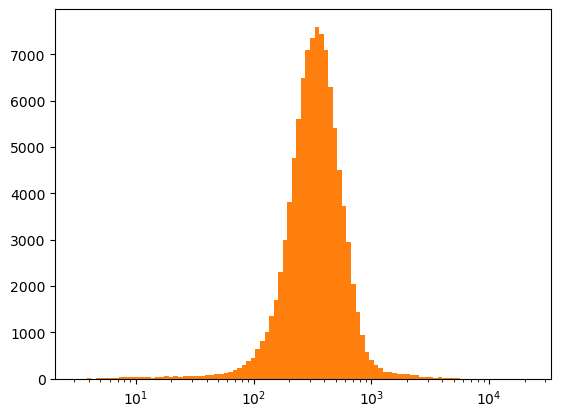

In [94]:
plot_loghist(SingleSales['PRICE_SQFT'], 100)
plt.show()

In [95]:
#While it may be difficult to judge based on the histogram, let's just filter out 1% of top and 1% of the bottom outliers. 
#We can do so using 'quantile' method (it orders the values in the increasing order and labels them by their rank divided by the total length of the sequence)

In [96]:
SingleSales['PRICE_SQFT'].quantile(0.01)

np.float64(45.59276018099548)

In [97]:
SingleSales['PRICE_SQFT'].quantile(0.99)

np.float64(1313.966528640446)

In [98]:
SingleSales = SingleSales[(SingleSales['PRICE_SQFT'] >= SingleSales['PRICE_SQFT'].quantile(0.01)) & (SingleSales['PRICE_SQFT'] <= SingleSales['PRICE_SQFT'].quantile(0.99))] #filter out the outliers

In [99]:
len(SingleSales) #as indeded we filter out around 2000 records (2% out of 100.000)

99027

In [100]:
SingleSales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,PRICE_SQFT
count,99027.000000,99027.000000,99027.000000,99027.000000,99027.000000,99027.000000,9.902700e+04,99027,99027.000000
mean,3.926848,6507.727751,72.680592,11005.798621,1606.681501,1944.289759,5.748815e+05,2015-11-20 02:11:24.685994752,368.076018
min,1.000000,14.000000,1.000000,10001.000000,300.000000,1850.000000,2.000000e+04,2011-01-03 00:00:00,45.625943
25%,3.000000,3744.000000,21.000000,10314.000000,1196.000000,1925.000000,3.600000e+05,2013-10-25 00:00:00,243.722304
50%,4.000000,5993.000000,41.000000,11234.000000,1440.000000,1940.000000,4.875000e+05,2016-01-21 00:00:00,335.574388
75%,5.000000,8866.000000,70.000000,11412.000000,1830.000000,1960.000000,6.760000e+05,2017-12-27 00:00:00,456.186907
max,5.000000,16323.000000,4336.000000,11694.000000,72703.000000,2019.000000,1.293333e+07,2019-12-31 00:00:00,1313.405797
std,0.873529,3768.859075,150.200066,488.790934,755.122871,27.350803,4.178017e+05,NaN,178.544887


In [ ]:
#Step 7. Spatial filtering and Geopandas

In [101]:
#Apply spatial cleaning and only use those zip codes belong to NYC

In [102]:
#load the resulting shapefile using geopandas 
zipcode = gpd.read_file('ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [103]:
#the list of all unique zip codes within the city
zipcode['ZIPCODE'].unique()

array(['11436', '11213', '11212', '11225', '11218', '11226', '11219',
       '11210', '11230', '11204', '10471', '10470', '10466', '10467',
       '10463', '10475', '10464', '10469', '10468', '10458', '10034',
       '10033', '10462', '10040', '10453', '10465', '10461', '10457',
       '10460', '10032', '10452', '10456', '10472', '10031', '10039',
       '10459', '10451', '10473', '10030', '10027', '10474', '10455',
       '10037', '10024', '10454', '10026', '10035', '10048', '10025',
       '11357', '10029', '00083', '11356', '11359', '11360', '11105',
       '10128', '10023', '11363', '10028', '11354', '11102', '11370',
       '10021', '11358', '11362', '10044', '11369', '11103', '11106',
       '11368', '11377', '11355', '11101', '11364', '10018', '10020',
       '11005', '10017', '10001', '10011', '10016', '11104', '11109',
       '10010', '11367', '10014', '10003', '11222', '10002', '11378',
       '10009', '10012', '10013', '10007', '11237', '11385', '10038',
       '11206', '100

In [107]:
zipcode['ZIPCODE'].nunique()

248

In [104]:
# we see the field is textual; so convert it to numeric (int)
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)
NYC_zipcode = zipcode['ZIPCODE'].unique()

In [105]:
NYC_zipcode

array([11436, 11213, 11212, 11225, 11218, 11226, 11219, 11210, 11230,
       11204, 10471, 10470, 10466, 10467, 10463, 10475, 10464, 10469,
       10468, 10458, 10034, 10033, 10462, 10040, 10453, 10465, 10461,
       10457, 10460, 10032, 10452, 10456, 10472, 10031, 10039, 10459,
       10451, 10473, 10030, 10027, 10474, 10455, 10037, 10024, 10454,
       10026, 10035, 10048, 10025, 11357, 10029,    83, 11356, 11359,
       11360, 11105, 10128, 10023, 11363, 10028, 11354, 11102, 11370,
       10021, 11358, 11362, 10044, 11369, 11103, 11106, 11368, 11377,
       11355, 11101, 11364, 10018, 10020, 11005, 10017, 10001, 10011,
       10016, 11104, 11109, 10010, 11367, 10014, 10003, 11222, 10002,
       11378, 10009, 10012, 10013, 10007, 11237, 11385, 10038, 11206,
       10006, 11412, 10005, 11251, 10004, 11411, 11201, 11205, 11208,
       11207, 11413, 11217, 11238, 11231, 11422, 11420, 11417, 11215,
       11232, 11430, 11203, 11239, 11236, 11220, 10301, 10303, 11234,
       10302, 11693,

In [112]:
SingleSales = SingleSales[SingleSales['ZIP CODE'].isin(NYC_zipcode)]

In [114]:
len(SingleSales) #we've only lost 9 more records 99027-99018

99018

In [115]:
SingleSales.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,CATEGORY ID,BUILDING CLASS NAME,PRICE_SQFT
1,2,3039,64,01 ONE FAMILY HOMES,467 EAST 185 STREET,10458.0,1296.0,1910.0,329000,2011-01-19,01,ONE FAMILY HOMES,253.858025
2,2,3046,34,01 ONE FAMILY HOMES,2085 BATHGATE AV,10457.0,1629.0,1899.0,288500,2011-06-29,01,ONE FAMILY HOMES,177.102517
3,2,3048,28,01 ONE FAMILY HOMES,540 EAST 182ND STREET,10457.0,1048.0,1901.0,122500,2011-03-21,01,ONE FAMILY HOMES,116.889313
43,2,4707,20,01 ONE FAMILY HOMES,1139 EAST 212TH STREET,10469.0,1890.0,1945.0,330000,2011-02-17,01,ONE FAMILY HOMES,174.603175
44,2,4707,74,01 ONE FAMILY HOMES,1144 EAST 213 STREET,10469.0,1018.0,1945.0,288000,2011-02-16,01,ONE FAMILY HOMES,282.907662


In [116]:
#Step 8. Temporal analysis. Does price per sq. foot change over time?

In [118]:
SingleSales['SALE YEAR']=pd.DatetimeIndex(SingleSales['SALE DATE']).year

In [119]:
SalesYear = SingleSales.groupby(['SALE YEAR']).agg({'ADDRESS':'count','SALE PRICE':'sum','GROSS SQUARE FEET':'sum'})
SalesYear['PriceperSQFT'] = SalesYear['SALE PRICE'] / SalesYear['GROSS SQUARE FEET']

In [120]:
SalesYear

,ADDRESS,SALE PRICE,GROSS SQUARE FEET,PriceperSQFT
SALE YEAR,,,,
2011,7750,3698759502,12957452.0,285.454231
2012,8773,4304955738,14912657.0,288.677983
2013,10249,5161345675,17207544.0,299.946679
2014,10488,5551955922,17550008.0,316.350621
2015,11699,6572735025,18335790.0,358.464785
2016,12290,7198027319,20223931.0,355.916331
2017,13135,8151778687,20018602.0,407.210188
2018,12733,8320365763,19578071.0,424.983941
2019,11901,7956391605,18297794.0,434.827915


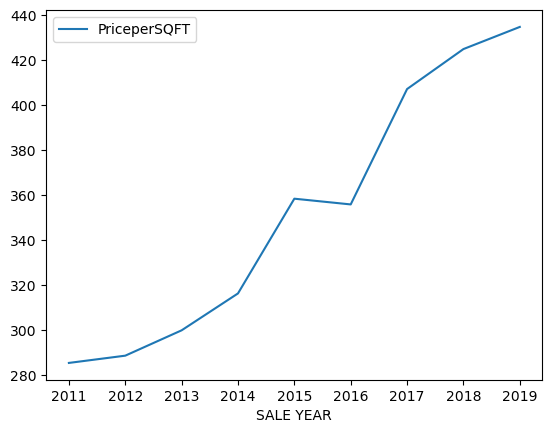

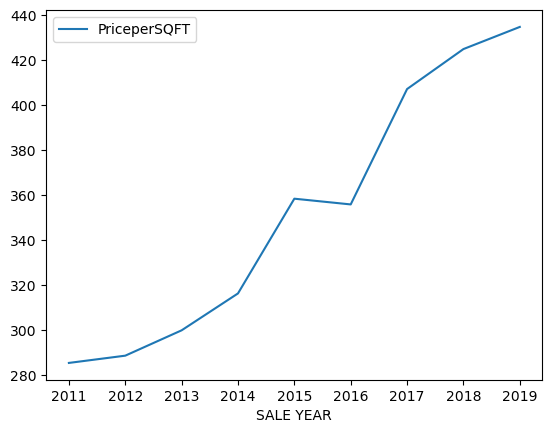

In [122]:
SalesYear.plot(y = 'PriceperSQFT', use_index = True)
plt.show()

In [ ]:
# the temporal analysis for the two-family houses producing temporal trend (price per sq. foot per year).

In [124]:
DoubleSales = Sales.loc[Sales['CATEGORY ID'] == '02']
TripleSales = Sales.loc[Sales['CATEGORY ID'] == '03']

In [125]:
DoubleSales['PRICE_SQFT'] = DoubleSales['SALE PRICE'] / DoubleSales['GROSS SQUARE FEET']
TripleSales['PRICE_SQFT'] = TripleSales['SALE PRICE'] / TripleSales['GROSS SQUARE FEET']

In [126]:
DoubleSales = DoubleSales[(DoubleSales['PRICE_SQFT'] >= DoubleSales['PRICE_SQFT'].quantile(0.01)) & (DoubleSales['PRICE_SQFT'] <= DoubleSales['PRICE_SQFT'].quantile(0.99))]
TripleSales = TripleSales[(TripleSales['PRICE_SQFT'] >= TripleSales['PRICE_SQFT'].quantile(0.01)) & (TripleSales['PRICE_SQFT'] <= TripleSales['PRICE_SQFT'].quantile(0.99))]

In [127]:
DoubleSales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,PRICE_SQFT
count,79871.00000,79871.000000,79871.000000,79871.000000,79871.000000,79871.000000,7.987100e+04,79871,79871.000000
mean,3.46192,5597.545079,55.273003,11075.496213,2247.900064,1938.631055,6.878326e+05,2015-09-23 19:46:15.530542848,316.434272
min,1.00000,3.000000,1.000000,10002.000000,300.000000,1855.000000,1.387000e+04,2011-01-03 00:00:00,17.582418
25%,3.00000,2782.000000,19.000000,10473.000000,1738.000000,1920.000000,4.200000e+05,2013-08-29 00:00:00,195.973419
50%,3.00000,4871.000000,38.000000,11223.000000,2124.000000,1930.000000,5.990000e+05,2015-10-29 00:00:00,281.690141
75%,4.00000,7861.000000,62.000000,11375.000000,2618.500000,1955.000000,8.289010e+05,2017-11-08 00:00:00,395.833333
max,5.00000,16298.000000,3054.000000,11694.000000,59212.000000,2019.000000,2.000000e+07,2019-12-31 00:00:00,1222.222222
std,0.88171,3763.735986,93.754833,418.954706,818.752221,32.215176,4.722449e+05,NaN,179.302209


In [129]:
TripleSales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,PRICE_SQFT
count,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000,2.020300e+04,20203,20203.000000
mean,3.096025,4147.683661,50.374301,11091.915112,3014.318468,1937.936940,8.429508e+05,2015-08-18 13:33:03.091619840,290.336756
min,1.000000,16.000000,1.000000,10001.000000,396.000000,1870.000000,1.000000e+04,2011-01-03 00:00:00,9.090909
25%,3.000000,1795.500000,19.000000,11203.000000,2508.000000,1910.000000,4.700000e+05,2013-08-07 00:00:00,154.994349
50%,3.000000,3471.000000,37.000000,11220.000000,2988.000000,1925.000000,7.050000e+05,2015-08-24 00:00:00,245.614035
75%,4.000000,5459.500000,60.000000,11354.000000,3402.000000,1965.000000,9.999990e+05,2017-10-04 00:00:00,373.134328
max,5.000000,16298.000000,3046.000000,11694.000000,31594.000000,2019.000000,2.400000e+07,2019-12-31 00:00:00,1240.740741
std,0.760555,3086.918724,84.458107,368.389205,874.017117,37.100865,6.080413e+05,NaN,193.466474


In [ ]:
# Compute average price per square foot of the one, two and three family houses per borough.

In [130]:
one_price = SingleSales.groupby('BOROUGH')['PRICE_SQFT'].mean()
two_price = DoubleSales.groupby('BOROUGH')['PRICE_SQFT'].mean()
three_price = DoubleSales.groupby('BOROUGH')['PRICE_SQFT'].mean()

In [131]:
one_price.head()

BOROUGH
1    701.558826
2    271.780489
3    438.616648
4    386.399267
5    310.535284
Name: PRICE_SQFT, dtype: float64

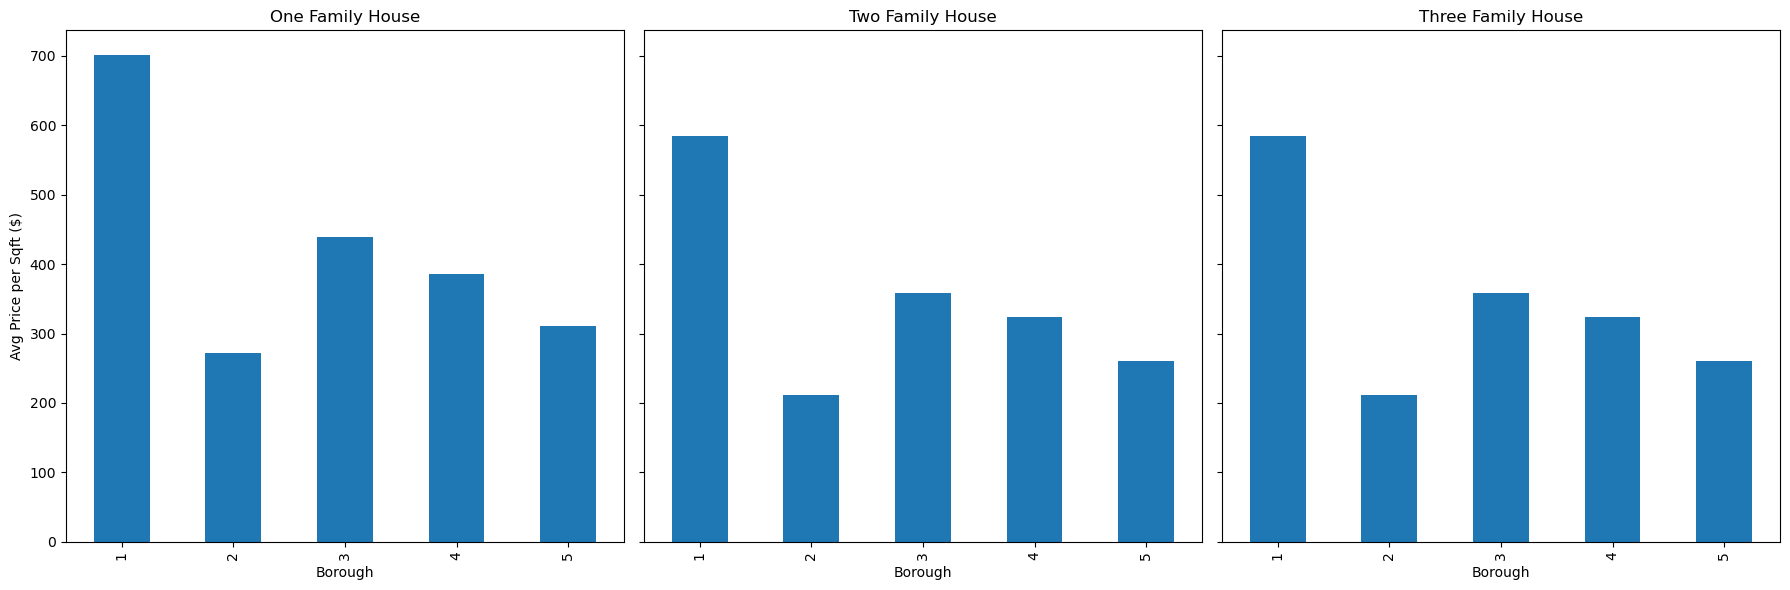

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

one_price.plot(kind='bar', ax=axes[0], title='One Family House')
two_price.plot(kind='bar', ax=axes[1], title='Two Family House')
three_price.plot(kind='bar', ax=axes[2], title='Three Family House')

for ax in axes:
    ax.set_ylabel("Avg Price per Sqft ($)")
    ax.set_xlabel("Borough")

plt.tight_layout()
plt.show()

In [133]:
one_price.index = one_price.index.astype(int)
two_price.index = two_price.index.astype(int)
three_price.index = three_price.index.astype(int)

In [134]:
result = pd.DataFrame({
    "One Family": one_price,
    "Two Family": two_price,
    "Three Family": three_price
})
result

,One Family,Two Family,Three Family
BOROUGH,,,
1,701.558826,584.188014,584.188014
2,271.780489,211.837698,211.837698
3,438.616648,357.888165,357.888165
4,386.399267,324.328309,324.328309
5,310.535284,261.142218,261.142218


In [ ]:
#Step 9. Temporal analysis. Visualize the average size (sq.foot) of the a single family house per zip code area.

In [135]:
sales = Sales.copy()

In [136]:
sales.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,CATEGORY ID,BUILDING CLASS NAME
1,2,3039,64,01 ONE FAMILY HOMES,467 EAST 185 STREET,10458.0,1296.0,1910.0,329000,2011-01-19,01,ONE FAMILY HOMES
2,2,3046,34,01 ONE FAMILY HOMES,2085 BATHGATE AV,10457.0,1629.0,1899.0,288500,2011-06-29,01,ONE FAMILY HOMES
3,2,3048,28,01 ONE FAMILY HOMES,540 EAST 182ND STREET,10457.0,1048.0,1901.0,122500,2011-03-21,01,ONE FAMILY HOMES
5,2,2929,128,02 TWO FAMILY HOMES,559 CLAREMONT PARKWAY,10457.0,2394.0,1995.0,365000,2011-07-13,02,TWO FAMILY HOMES
6,2,3030,76,02 TWO FAMILY HOMES,4435 PARK AVENUE,10457.0,2125.0,1899.0,375000,2011-05-18,02,TWO FAMILY HOMES


In [137]:
sales = sales[
    (sales['CATEGORY ID'] == '01') &
    (sales['SALE PRICE'] > 0) &
    (sales['GROSS SQUARE FEET'] > 0)
]

In [138]:
sales.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,CATEGORY ID,BUILDING CLASS NAME
1,2,3039,64,01 ONE FAMILY HOMES,467 EAST 185 STREET,10458.0,1296.0,1910.0,329000,2011-01-19,01,ONE FAMILY HOMES
2,2,3046,34,01 ONE FAMILY HOMES,2085 BATHGATE AV,10457.0,1629.0,1899.0,288500,2011-06-29,01,ONE FAMILY HOMES
3,2,3048,28,01 ONE FAMILY HOMES,540 EAST 182ND STREET,10457.0,1048.0,1901.0,122500,2011-03-21,01,ONE FAMILY HOMES
43,2,4707,20,01 ONE FAMILY HOMES,1139 EAST 212TH STREET,10469.0,1890.0,1945.0,330000,2011-02-17,01,ONE FAMILY HOMES
44,2,4707,74,01 ONE FAMILY HOMES,1144 EAST 213 STREET,10469.0,1018.0,1945.0,288000,2011-02-16,01,ONE FAMILY HOMES


In [139]:
#compute average size grouped by ZIP
zip_stats = sales.groupby('ZIP CODE').agg(
    avg_size = ('GROSS SQUARE FEET', 'mean'),
    count = ('GROSS SQUARE FEET', 'count')
).reset_index()

In [140]:
zip_stats.head()

,ZIP CODE,avg_size,count
0,10001.0,9056.000000,5
1,10002.0,3520.000000,1
2,10003.0,4618.913043,23
3,10009.0,5252.600000,5
4,10010.0,6560.000000,1


In [141]:
zip_stats = zip_stats[zip_stats['count'] >= 20]

In [142]:
zip_stats.sort_values('avg_size', ascending = False)

,ZIP CODE,avg_size,count
7,10013.0,7941.652174,23
13,10023.0,6677.450000,20
11,10021.0,6499.072464,69
14,10024.0,5340.590909,44
29,10065.0,5288.959459,74
...,...,...,...
160,11434.0,1277.573129,2605
150,11420.0,1277.284124,1707
159,11433.0,1266.624088,1370
165,11693.0,1232.238245,319


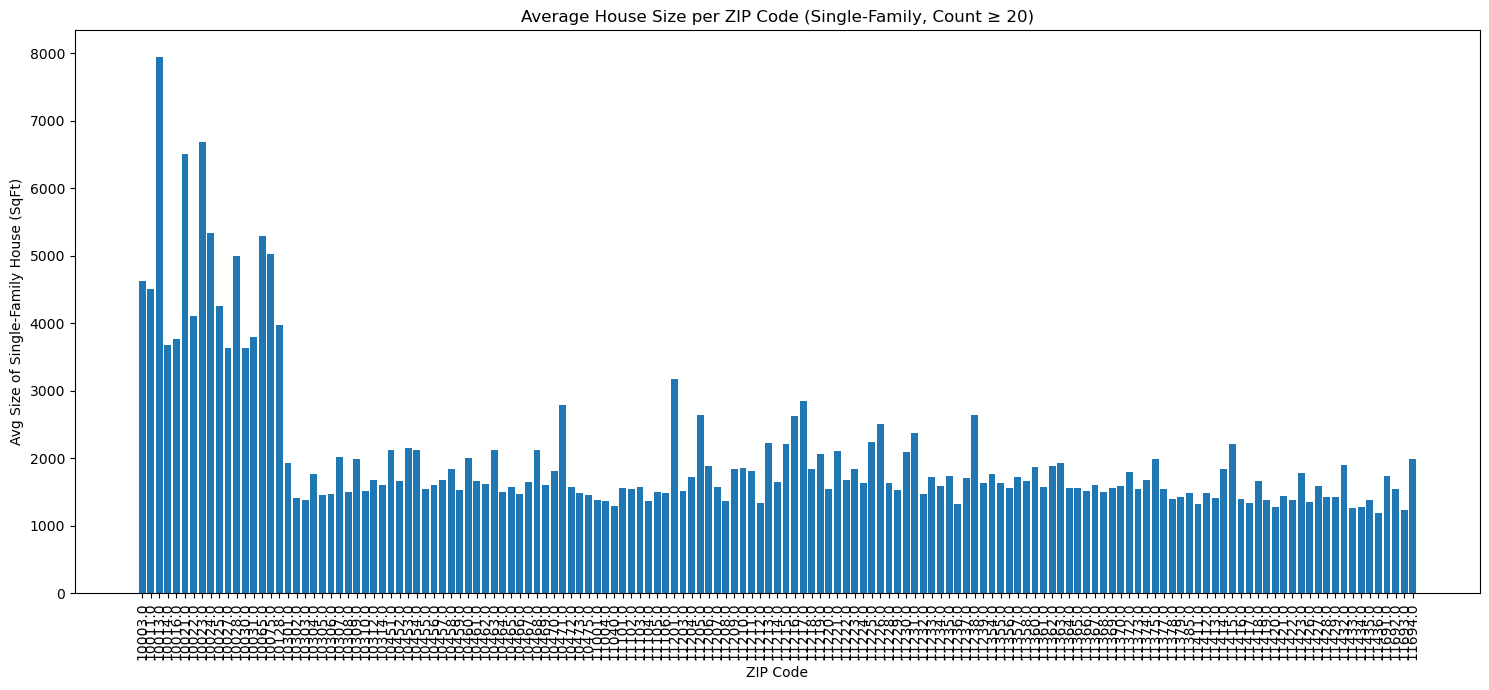

,ZIP CODE,avg_size,count
2,10003.0,4618.913043,23
5,10011.0,4503.607143,56
7,10013.0,7941.652174,23
8,10014.0,3669.148148,108
9,10016.0,3767.076923,26
11,10021.0,6499.072464,69
12,10022.0,4112.342857,35
13,10023.0,6677.450000,20
14,10024.0,5340.590909,44
15,10025.0,4258.190476,21


In [143]:
plt.figure(figsize=(15, 7))
plt.bar(zip_stats['ZIP CODE'].astype(str), zip_stats['avg_size'])

plt.xticks(rotation=90)
plt.xlabel('ZIP Code')
plt.ylabel('Avg Size of Single-Family House (SqFt)')
plt.title('Average House Size per ZIP Code (Single-Family, Count ≥ 20)')
plt.tight_layout()
plt.show()

zip_stats.head(10)

In [ ]:
#Step 10. Spatial analysis Average price per sq.foot per zipcode

In [145]:
SingleSalesRecent = SingleSales[SingleSales['SALE YEAR']>=2017] #Going forward consider only 3 most recent years 2017-2019 which saw relatively moderate increase wihtin 7% overall as compared to previous years

In [146]:
SingleSalesRecent.reset_index(inplace=True,drop=True)
SingleSalesRecent.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,PRICE_SQFT,SALE YEAR
count,37769.000000,37769.000000,37769.000000,37769.000000,37769.000000,37769.000000,3.776900e+04,37769,37769.000000,37769.000000
mean,3.941486,6559.033202,74.625937,10984.051471,1532.856761,1945.154836,6.467880e+05,2018-06-25 18:29:42.604781824,432.380384,2017.967328
min,1.000000,15.000000,1.000000,10001.000000,300.000000,1850.000000,2.000000e+04,2017-01-03 00:00:00,45.787546,2017.000000
25%,3.000000,3736.000000,21.000000,10314.000000,1160.000000,1925.000000,4.250000e+05,2017-09-26 00:00:00,302.734375,2017.000000
50%,4.000000,5966.000000,42.000000,11234.000000,1378.000000,1940.000000,5.550000e+05,2018-06-21 00:00:00,401.234568,2018.000000
75%,5.000000,9006.000000,71.000000,11412.000000,1728.000000,1960.000000,7.650000e+05,2019-03-28 00:00:00,532.094595,2019.000000
max,5.000000,16323.000000,4328.000000,11694.000000,12720.000000,2019.000000,1.160500e+07,2019-12-31 00:00:00,1313.271605,2019.000000
std,0.891823,3826.558050,155.741961,496.801575,653.779972,27.859913,4.268685e+05,NaN,187.508974,0.813524


In [147]:
#group sales by zip code
SalesZipcode = SingleSalesRecent.groupby(['ZIP CODE']).agg({'ADDRESS':'count','SALE PRICE':'sum','GROSS SQUARE FEET':'sum'})
SalesZipcode['PriceperSQFT'] = SalesZipcode['SALE PRICE'] / SalesZipcode['GROSS SQUARE FEET']

In [148]:
SalesZipcode.head()

,ADDRESS,SALE PRICE,GROSS SQUARE FEET,PriceperSQFT
ZIP CODE,,,,
10001.0,1,5500000,4290.0,1282.051282
10009.0,3,16700000,18880.0,884.533898
10011.0,1,2421900,3935.0,615.476493
10013.0,2,10107000,8700.0,1161.724138
10014.0,2,7800000,10203.0,764.481035


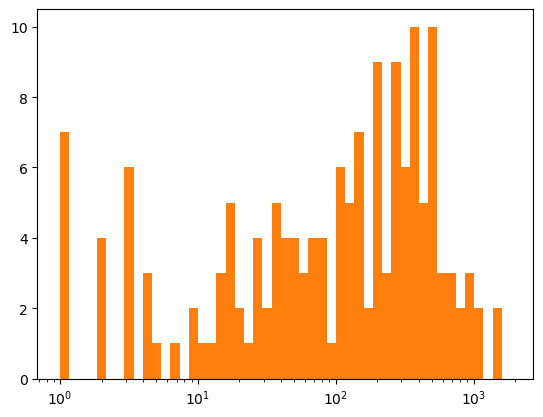

In [150]:
#records per zip code
plot_loghist(SalesZipcode['ADDRESS'],bins=50);
plt.show()

In [151]:
#how 
sum(SalesZipcode['ADDRESS']>=20)

121

In [152]:
SalesZipcode=SalesZipcode.loc[SalesZipcode['ADDRESS']>=20]

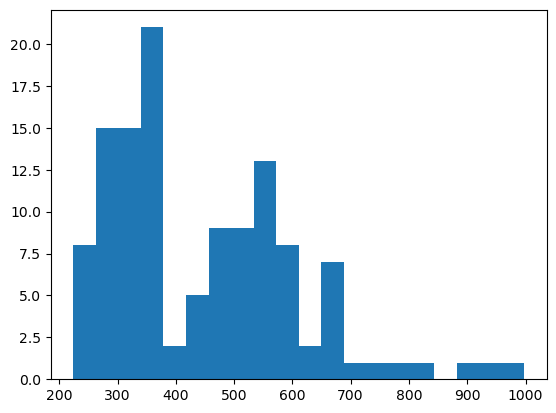

In [153]:
#distribution of price per sq.foot
plt.hist(SalesZipcode['PriceperSQFT'],bins=20);
plt.show()

In [154]:
#Step 11. Merge with zipcode shapefile

In [155]:
zipcode.head(2)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1..."


In [156]:
#merge price data with the zip code shapes into a new geopandas dataframe
SalesGeo = zipcode.merge(SalesZipcode,left_on='ZIPCODE',right_on='ZIP CODE',how='left')

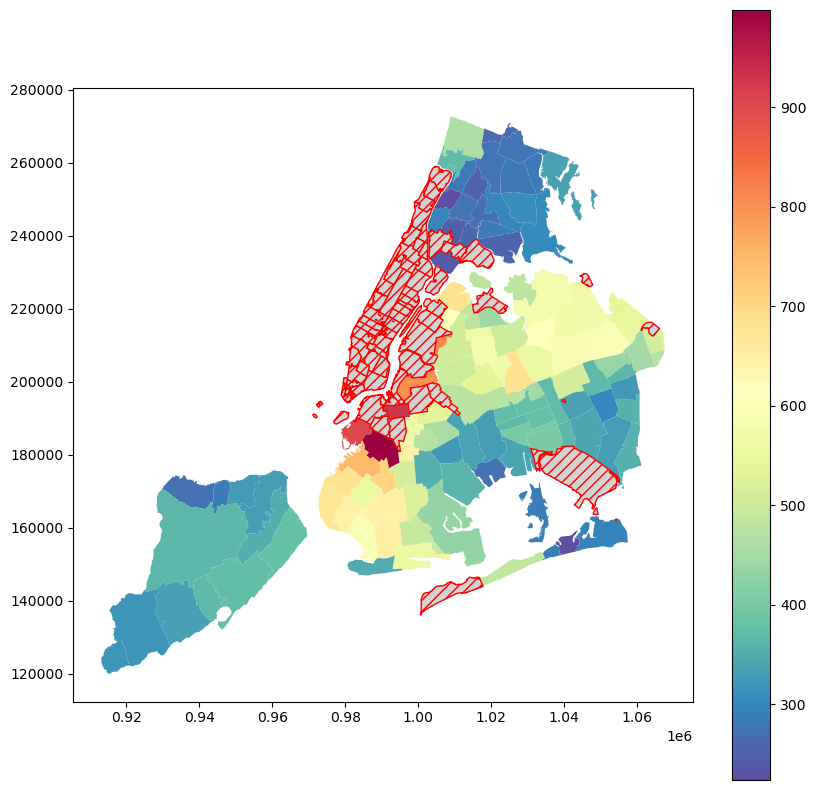

In [157]:
# #plot the spatial distribution of sale price normalized by gross square feet
# SalesGeo.plot(column='PriceperSQFT',colormap='Spectral_r',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
#                 "color": "lightgrey", ## what to do with missing values
#                 "edgecolor": "red",
#                 "hatch": "///",
#                 "label": "Missing values",
#                 },)

SalesGeo.plot(
    column='PriceperSQFT',
    cmap='Spectral_r',
    legend=True,
    markersize=0.01,
    figsize=(10,10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    }
)
plt.show()

In [159]:
SalesGeo.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# zipcode map is projected to EPSG 2263, which is a local coordinate system that provides a high degree of accuracy and balances size and shape well. x, y axis in the previous plot is the coordinate in this projection system, in feet

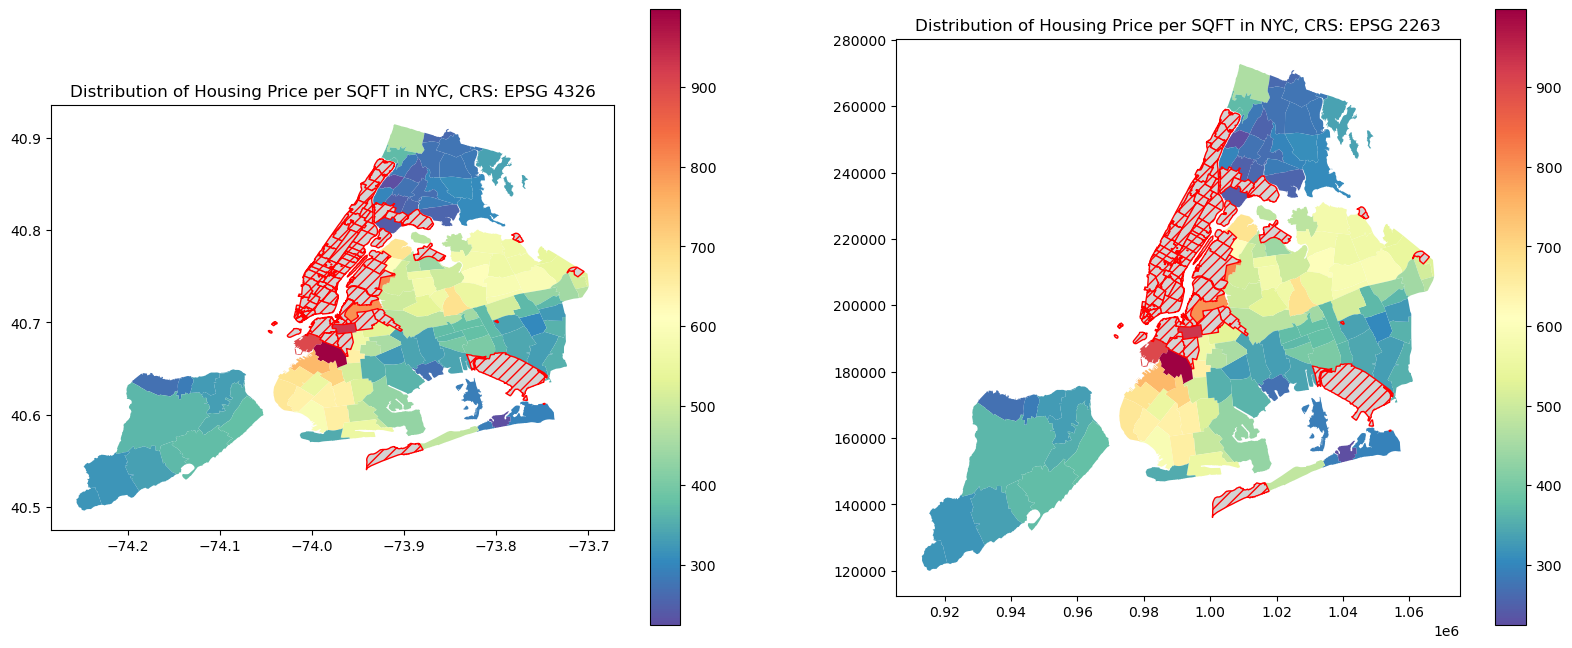

In [160]:
# '''plot the spatial distribution of sale price normalized by gross square feet'''
# fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
# SalesGeo.to_crs({'init': 'epsg:4326'}).plot(ax=ax[0],column='PriceperSQFT',
#                                             colormap='Spectral_r',legend=True,
#                                             missing_kwds={
#                                                             "color": "lightgrey",
#                                                             "edgecolor": "red",
#                                                             "hatch": "///",
#                                                             "label": "Missing values",
#                                                             },)
# ax[0].set_aspect('equal')
# ax[0].set_title('Distribution of Housing Price per SQFT in NYC, CRS: EPSG 4263',fontsize=12) 
# SalesGeo.to_crs({'init': 'epsg:2263'}).plot(ax=ax[1],column='PriceperSQFT',
#                                             colormap='Spectral_r',legend=True,
#                                             missing_kwds={
#                                                             "color": "lightgrey",
#                                                             "edgecolor": "red",
#                                                             "hatch": "///",
#                                                             "label": "Missing values",
#                                                             },)
# ax[1].set_title('Distribution of Housing Price per SQFT in NYC, CRS: EPSG 2263',fontsize=12) 

'''plot the spatial distribution of sale price normalized by gross square feet'''

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# First map: EPSG 4326
SalesGeo.to_crs(epsg=4326).plot(
    ax=ax[0],
    column='PriceperSQFT',
    cmap='Spectral_r',
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    }
)
ax[0].set_aspect('equal')
ax[0].set_title('Distribution of Housing Price per SQFT in NYC, CRS: EPSG 4326', fontsize=12)

# Second map: EPSG 2263
SalesGeo.to_crs(epsg=2263).plot(
    ax=ax[1],
    column='PriceperSQFT',
    cmap='Spectral_r',
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    }
)
ax[1].set_title('Distribution of Housing Price per SQFT in NYC, CRS: EPSG 2263', fontsize=12)

plt.show()

In [161]:
# url = 'https://data.cityofnewyork.us/api/views/?64uk-42ks/rows.csv?accessType=DOWNLOAD'
url = "https://data.cityofnewyork.us/api/views/64uk-42ks/rows.csv?accessType=DOWNLOAD"
# url = "https://media.githubusercontent.com/media/CUSP2020PUI/Data/master/BBL.csv"
urllib.request.urlretrieve(url, 'Data/BBL.csv')
BBL = pd.read_csv('Data/BBL.csv')

In [163]:
BBL = BBL[['borough', 'Tax block', 'Tax lot', 'latitude', 'longitude']]
BBL.head()

,borough,Tax block,Tax lot,latitude,longitude
0,QN,6421,38,40.743955,-73.819475
1,QN,5175,20,40.744709,-73.819221
2,QN,5173,111,40.745663,-73.819727
3,QN,5174,16,40.745370,-73.820287
4,QN,6413,46,40.744404,-73.820864


In [164]:
BBL = BBL.rename(columns={
    'Tax block': 'block',
    'Tax lot': 'lot'
})

In [165]:
BBL.head()

,borough,block,lot,latitude,longitude
0,QN,6421,38,40.743955,-73.819475
1,QN,5175,20,40.744709,-73.819221
2,QN,5173,111,40.745663,-73.819727
3,QN,5174,16,40.745370,-73.820287
4,QN,6413,46,40.744404,-73.820864


In [166]:
'''borough, block, lot are not unique values. For example, there are 9772 lots are numbered as lot 46'''
BBL.loc[BBL['lot']==46]

,borough,block,lot,latitude,longitude
4,QN,6413,46,40.744404,-73.820864
11,QN,6406,46,40.745208,-73.822301
20,QN,5171,46,40.745625,-73.821950
25,QN,6421,46,40.744268,-73.819511
201,QN,5175,46,40.744909,-73.818910
...,...,...,...,...,...
857114,QN,14024,46,40.655290,-73.845365
857167,QN,14080,46,40.649167,-73.843848
857338,BK,3004,46,40.706151,-73.929985
857431,QN,14149,46,40.663371,-73.839594


In [167]:
'''but if we loc dataframe by borough, block, and lot together, only one row is returned. Thus, to merge BBL 
coordinate dataframe to sales dataframe, we need to use three columns as the merge-key'''
BBL.loc[(BBL['borough']=='BK')&(BBL['block']==834)&(BBL['lot']==46)]

,borough,block,lot,latitude,longitude
677899,BK,834,46,40.637972,-74.007347


In [168]:
BoroCode = {'BK':'3', 'QN':'4', 'BX':'2', 'SI':'5', 'MN':'1'}
BBL['borough'] = BBL.borough.apply(lambda x: BoroCode[x] if x in BoroCode else np.nan)
'''drop rows which have nan value in any column'''
BBL.dropna(inplace=True)

In [169]:
'''before merge, we need to convert  borough, block, lot in BBL dataframe and residenceSale dataframe to 
same type: string. '''

#convert BBL column names same as residenceSale to make further steps easier
BBL.columns = [col.upper() for col in BBL.columns]
BBL['BOROUGH'] = BBL['BOROUGH'].astype('str')
BBL['BLOCK'] = BBL['BLOCK'].astype('str')
BBL['LOT'] = BBL['LOT'].astype('str')
SingleSales['BOROUGH'] = SingleSales['BOROUGH'].astype('str')
SingleSales['BLOCK'] = SingleSales['BLOCK'].astype('str')
SingleSales['LOT'] = SingleSales['LOT'].astype('str')
SingleSalesLatLon = BBL.merge(SingleSales,on=['BOROUGH','BLOCK','LOT'],how='right')
'''or we can do:'''
# residenceSaleLatLon = BBL.merge(residenceSale,right_on=['BOROUGH','BLOCK','LOT'],\
#                                 left_on=['BOROUGH','BLOCK','LOT'],how='right')

SingleSalesLatLon.dropna(inplace=True)

In [170]:
SingleSalesLatLon.head()

,BOROUGH,BLOCK,LOT,LATITUDE,LONGITUDE,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,CATEGORY ID,BUILDING CLASS NAME,PRICE_SQFT,SALE YEAR
0,2,3039,64,40.856775,-73.892470,01 ONE FAMILY HOMES,467 EAST 185 STREET,10458.0,1296.0,1910.0,329000,2011-01-19,01,ONE FAMILY HOMES,253.858025,2011
1,2,3046,34,40.851016,-73.895125,01 ONE FAMILY HOMES,2085 BATHGATE AV,10457.0,1629.0,1899.0,288500,2011-06-29,01,ONE FAMILY HOMES,177.102517,2011
2,2,3048,28,40.852886,-73.892805,01 ONE FAMILY HOMES,540 EAST 182ND STREET,10457.0,1048.0,1901.0,122500,2011-03-21,01,ONE FAMILY HOMES,116.889313,2011
3,2,4707,20,40.875239,-73.853261,01 ONE FAMILY HOMES,1139 EAST 212TH STREET,10469.0,1890.0,1945.0,330000,2011-02-17,01,ONE FAMILY HOMES,174.603175,2011
4,2,4707,74,40.875513,-73.853036,01 ONE FAMILY HOMES,1144 EAST 213 STREET,10469.0,1018.0,1945.0,288000,2011-02-16,01,ONE FAMILY HOMES,282.907662,2011


In [175]:
'''make points from given latitudes and longitudes'''
geometry = [Point(xy) for xy in zip(SingleSalesLatLon.LONGITUDE, SingleSalesLatLon.LATITUDE)]

geoSingleSalesLatLon = gpd.GeoDataFrame(SingleSalesLatLon[['SALE PRICE','GROSS SQUARE FEET']],
                                    geometry=geometry,crs={'init': 'epsg:4326'})
'''crs={'init': 'epsg:4326'} is define the coordinate system when generating a new geodataframe'''

"crs={'init': 'epsg:4326'} is define the coordinate system when generating a new geodataframe"

In [176]:
# read neighborhood map
# url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
# alternative url
url = 'https://github.com/CUSP2020PUI/Data/raw/master/neighborhood.geojson'
urllib.request.urlretrieve(url,'Data/neighborhood.geojson')
neighborhood = gpd.read_file('Data/neighborhood.geojson')
neighborhood = neighborhood[['ntacode','geometry']]
neighborhood.head()

,ntacode,geometry
0,BK88,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
1,QN51,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ..."
2,QN27,"MULTIPOLYGON (((-73.8611 40.76366, -73.85993 4..."
3,BK95,"MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ..."
4,QN07,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ..."


In [177]:
'''spatial join sales data to neighborhood map, 
and calculate the average housing sales price per sqft at each neighborhood'''

# Spatial join with new syntax
ResidenceSaleNeighborhood = gpd.sjoin(
    geoSingleSalesLatLon,
    neighborhood,
    predicate='within',
    how='right'
)

# Transaction count
ResidenceSaleNeighborhood['SaleTimes'] = 1

# Groupby summary
ResidenceSaleNeighborhood = ResidenceSaleNeighborhood.groupby('ntacode').agg({
    'SALE PRICE': 'sum',
    'GROSS SQUARE FEET': 'sum',
    'SaleTimes': 'sum'
}).reset_index()

# Reattach geometry from neighborhood map
ResidenceSaleNeighborhood = neighborhood.merge(ResidenceSaleNeighborhood, on='ntacode', how='left')

# Price per sqft
ResidenceSaleNeighborhood['PriceperSQFT'] = (
    ResidenceSaleNeighborhood['SALE PRICE'] / 
    ResidenceSaleNeighborhood['GROSS SQUARE FEET']
)

In [178]:
ResidenceSaleNeighborhood

,ntacode,geometry,SALE PRICE,GROSS SQUARE FEET,SaleTimes,PriceperSQFT
0,BK88,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...",3.245400e+08,672788.0,348,482.380726
1,QN51,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...",1.044263e+09,2344285.0,1326,445.450585
2,QN27,"MULTIPOLYGON (((-73.8611 40.76366, -73.85993 4...",2.361079e+08,716505.0,467,329.527218
3,BK95,"MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...",7.329872e+07,221232.0,140,331.320582
4,QN07,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...",3.429148e+08,1384654.0,823,247.653785
...,...,...,...,...,...,...
190,BX39,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",3.797525e+07,184529.0,90,205.795566
191,BK30,"MULTIPOLYGON (((-74.00702 40.63211, -74.00634 ...",5.450569e+08,1079552.0,666,504.891755
192,BK31,"MULTIPOLYGON (((-74.03267 40.64372, -74.03261 ...",8.855791e+08,1603160.0,889,552.395952
193,SI05,"MULTIPOLYGON (((-74.15379 40.61226, -74.15372 ...",9.749551e+08,3358846.0,2036,290.264912


In [179]:
# eliminate average sale price records in neighborhoods where transaction times below 20
ResidenceSaleNeighborhood.loc[ResidenceSaleNeighborhood['SaleTimes']<20,'PriceperSQFT'] = np.nan

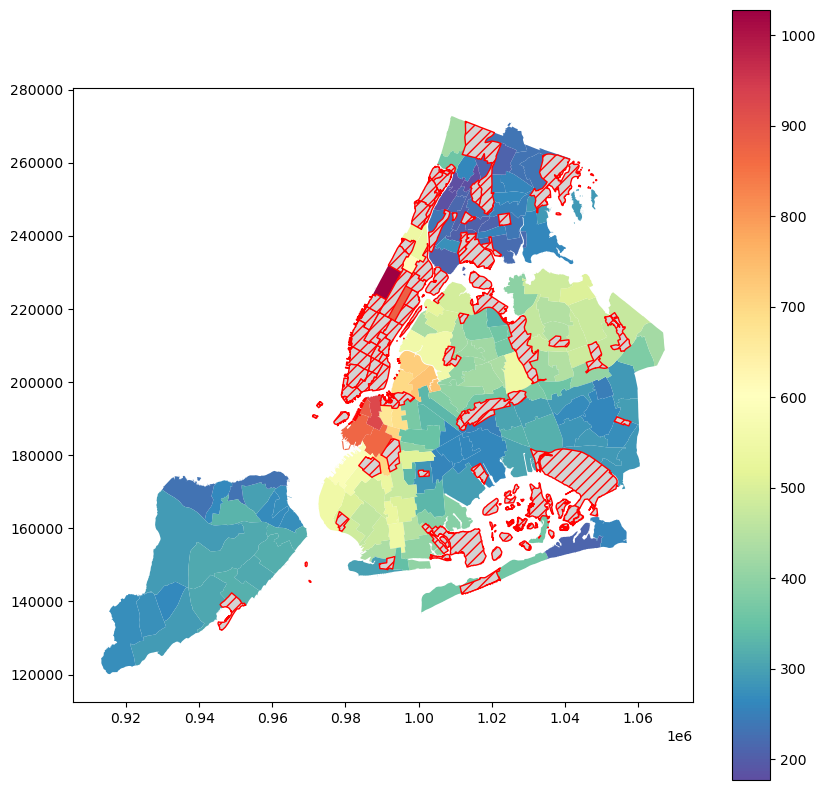

In [180]:
ResidenceSaleNeighborhood.to_crs(epsg=2263).plot(
    column='PriceperSQFT',
    cmap='Spectral_r',
    legend=True,
    markersize=0.01,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
    figsize=(10,10)
)
plt.show()

In [ ]:
#Plot 10 zip codes with highest and 10 with the lowest single family house prices per SQFT in NYC. Use two different colors for high and low price areas and third color for the rest of zip code areas. 
#As before exclude those with <20 transactions (shade them as before). Provide legend

In [181]:
import matplotlib.patches as mpatches
fig,ax = plt.subplots(figsize=(10,10))
SalesGeo.plot(facecolor='lightgrey',hatch='///',ax=ax)
SalesGeo.loc[SalesGeo['ADDRESS']>20].plot(facecolor='darkblue',ax=ax)

LegendElement = [
                mpatches.Patch(facecolor='lightgrey', hatch='//', label='Transaction=<20'),
                mpatches.Patch(facecolor='darkblue', label='Transaction>20'),
                ]
ax.legend(handles = LegendElement, loc='upper left')
ax.axis('off')

(np.float64(905410.7560429365),
 np.float64(1075212.5382562787),
 np.float64(112386.35181947277),
 np.float64(280345.45402395504))

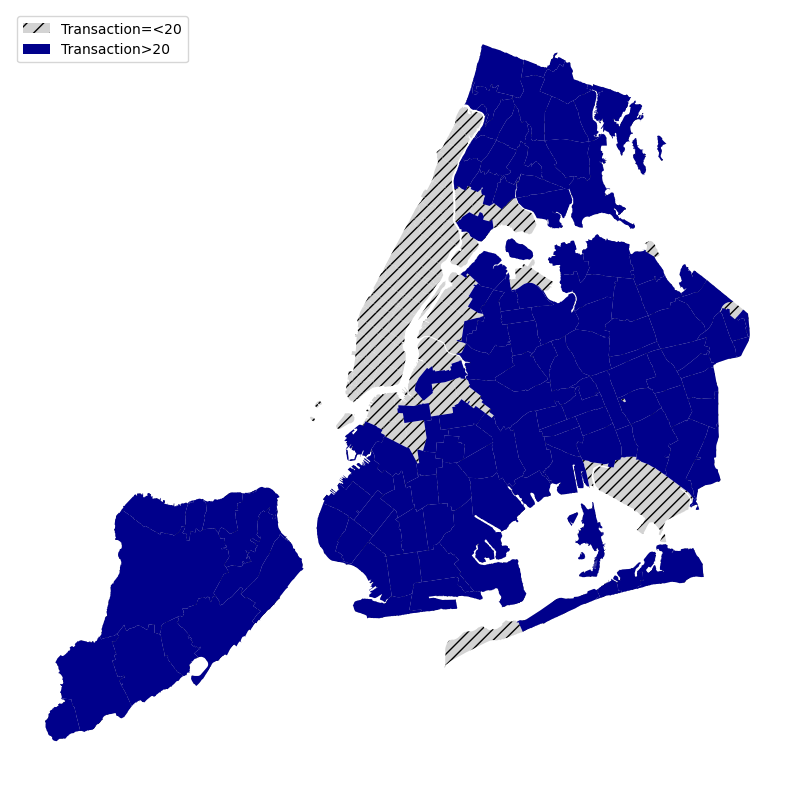

In [182]:
plt.show()

In [183]:
df = Sales.copy()

In [184]:
df.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,CATEGORY ID,BUILDING CLASS NAME
1,2,3039,64,01 ONE FAMILY HOMES,467 EAST 185 STREET,10458.0,1296.0,1910.0,329000,2011-01-19,01,ONE FAMILY HOMES
2,2,3046,34,01 ONE FAMILY HOMES,2085 BATHGATE AV,10457.0,1629.0,1899.0,288500,2011-06-29,01,ONE FAMILY HOMES
3,2,3048,28,01 ONE FAMILY HOMES,540 EAST 182ND STREET,10457.0,1048.0,1901.0,122500,2011-03-21,01,ONE FAMILY HOMES
5,2,2929,128,02 TWO FAMILY HOMES,559 CLAREMONT PARKWAY,10457.0,2394.0,1995.0,365000,2011-07-13,02,TWO FAMILY HOMES
6,2,3030,76,02 TWO FAMILY HOMES,4435 PARK AVENUE,10457.0,2125.0,1899.0,375000,2011-05-18,02,TWO FAMILY HOMES


In [185]:
df = df[(df['CATEGORY ID'] == '01') &
        (df['SALE PRICE'] > 0) &
        (df['GROSS SQUARE FEET'] > 0)]

In [186]:
df.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,CATEGORY ID,BUILDING CLASS NAME
1,2,3039,64,01 ONE FAMILY HOMES,467 EAST 185 STREET,10458.0,1296.0,1910.0,329000,2011-01-19,01,ONE FAMILY HOMES
2,2,3046,34,01 ONE FAMILY HOMES,2085 BATHGATE AV,10457.0,1629.0,1899.0,288500,2011-06-29,01,ONE FAMILY HOMES
3,2,3048,28,01 ONE FAMILY HOMES,540 EAST 182ND STREET,10457.0,1048.0,1901.0,122500,2011-03-21,01,ONE FAMILY HOMES
43,2,4707,20,01 ONE FAMILY HOMES,1139 EAST 212TH STREET,10469.0,1890.0,1945.0,330000,2011-02-17,01,ONE FAMILY HOMES
44,2,4707,74,01 ONE FAMILY HOMES,1144 EAST 213 STREET,10469.0,1018.0,1945.0,288000,2011-02-16,01,ONE FAMILY HOMES


In [187]:
df['PricePerSqft'] = df['SALE PRICE'] / df['GROSS SQUARE FEET']

In [188]:
zip_stats = df.groupby('ZIP CODE').agg(
    avg_price=('PricePerSqft', 'mean'),
    count=('PricePerSqft', 'count')
).reset_index()

In [189]:
zip_stats.head()

,ZIP CODE,avg_price,count
0,10001.0,889.297960,5
1,10002.0,1008.522727,1
2,10003.0,2260.815161,23
3,10009.0,1250.395492,5
4,10010.0,2172.256098,1


In [190]:
zip_stats['type'] = 'mid'  # others
zip_stats.loc[zip_stats['count'] < 20, 'type'] = 'low_count'

In [191]:
# Only consider ZIP with >=20 for rankings
valid = zip_stats[zip_stats['count'] >= 20]

In [192]:
# Top 10 and bottom 10
top10 = valid.nlargest(10, 'avg_price')
bottom10 = valid.nsmallest(10, 'avg_price')

In [193]:
zip_stats.loc[top10.index, 'type'] = 'high_price'
zip_stats.loc[bottom10.index, 'type'] = 'low_price'

In [194]:
df = zip_stats.copy()

In [195]:
df.rename(columns={'ZIP CODE':'ZIP_CODE'}, inplace=True)
SalesGeo.rename(columns={'ZIPCODE':'ZIP_CODE'}, inplace=True)

In [196]:
df['type'] = 'mid'
df.loc[df['count'] < 20, 'type'] = 'low_count'
df.loc[top10.index, 'type'] = 'high_price'
df.loc[bottom10.index, 'type'] = 'low_price'

In [197]:
df['type'] = 'mid'
df.loc[df['count'] < 20, 'type'] = 'low_count'
df.loc[top10.index, 'type'] = 'high_price'
df.loc[bottom10.index, 'type'] = 'low_price'

In [198]:
geo = SalesGeo.dissolve(by='ZIP_CODE').reset_index()
geo = geo.merge(df[['ZIP_CODE', 'type']], on='ZIP_CODE', how='left')

In [199]:
print(df.columns)

Index(['ZIP_CODE', 'avg_price', 'count', 'type'], dtype='object')


In [200]:
print(geo.columns)

Index(['ZIP_CODE', 'geometry', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA',
       'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA',
       'SHAPE_LEN', 'ADDRESS', 'SALE PRICE', 'GROSS SQUARE FEET',
       'PriceperSQFT', 'type'],
      dtype='object')


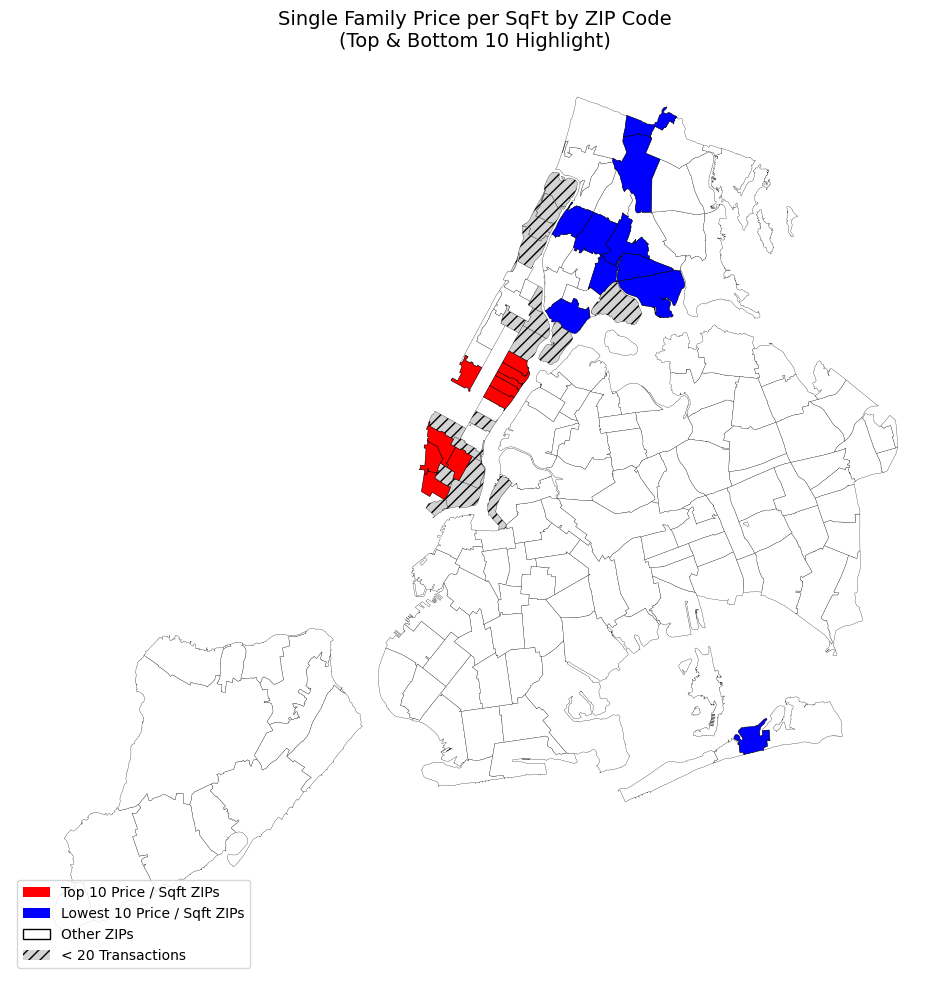

In [201]:
fig, ax = plt.subplots(figsize=(12, 12))

# Shade low count ZIPs first
geo[geo['type'] == 'low_count'].plot(
    ax=ax, facecolor='lightgrey', hatch='///', edgecolor='black', linewidth=0.2
)

# Mid price group
geo[geo['type'] == 'mid'].plot(
    ax=ax, facecolor='white', edgecolor='black', linewidth=0.2
)

# Highest 10 ZIPs
geo[geo['type'] == 'high_price'].plot(
    ax=ax, facecolor='red', edgecolor='black', linewidth=0.4
)

# Lowest 10 ZIPs
geo[geo['type'] == 'low_price'].plot(
    ax=ax, facecolor='blue', edgecolor='black', linewidth=0.4
)

# Legend
legend_elements = [
    mpatches.Patch(facecolor='red', label='Top 10 Price / Sqft ZIPs'),
    mpatches.Patch(facecolor='blue', label='Lowest 10 Price / Sqft ZIPs'),
    mpatches.Patch(facecolor='white', edgecolor='black', label='Other ZIPs'),
    mpatches.Patch(facecolor='lightgrey', hatch='///', label='< 20 Transactions')
]
ax.legend(handles=legend_elements, loc='lower left')

ax.set_title("Single Family Price per SqFt by ZIP Code\n(Top & Bottom 10 Highlight)", fontsize=14)
ax.axis('off')

plt.show()

In [ ]:
#As we can see, the most expensive area are in manhattan and cheapest in queen.